In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

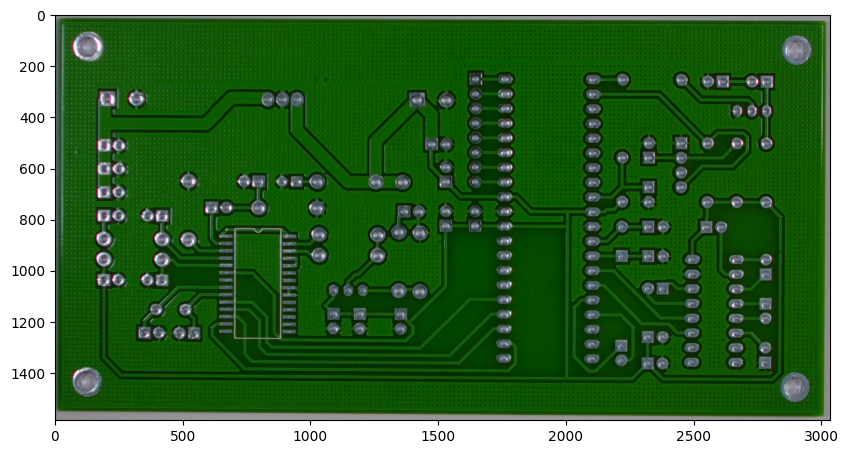

In [ ]:
# read template PCB 01 image
rgb_template_img = cv2.imread('/content/drive/MyDrive/PCB_DATASET/PCB_USED/01.JPG')

# display original template PCB image
plt.figure(figsize=(10,6))
plt.imshow(rgb_template_img, cmap="gray")

In [ ]:
a = int(rgb_template_img.shape[0]/4)
b = int(rgb_template_img.shape[1]/4)
a,b

(396, 758)

In [ ]:
# read template PCB 01 image as grayscale image
template_img = cv2.imread('/content/drive/MyDrive/PCB_DATASET/PCB_USED/01.JPG', 0)
# the 2nd parameter is flag, makes image grayscale for value 0 or 2

# display the grayscale template PCB image
# plt.figure(figsize=(10,6))
# plt.imshow(template_img, cmap="gray")

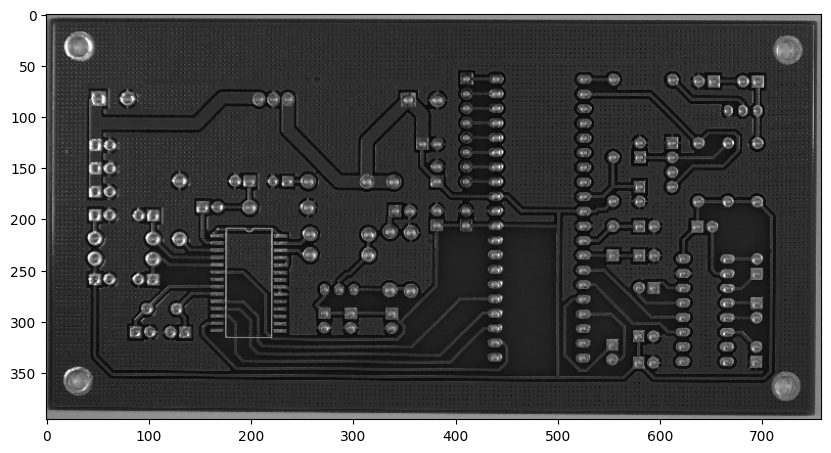

In [ ]:
# resize template image of PCB
template_img_resize = cv2.resize(template_img, (b,a))

# display the grayscale resized template PCB image
plt.figure(figsize=(10,6))
plt.imshow(template_img_resize, cmap="gray")

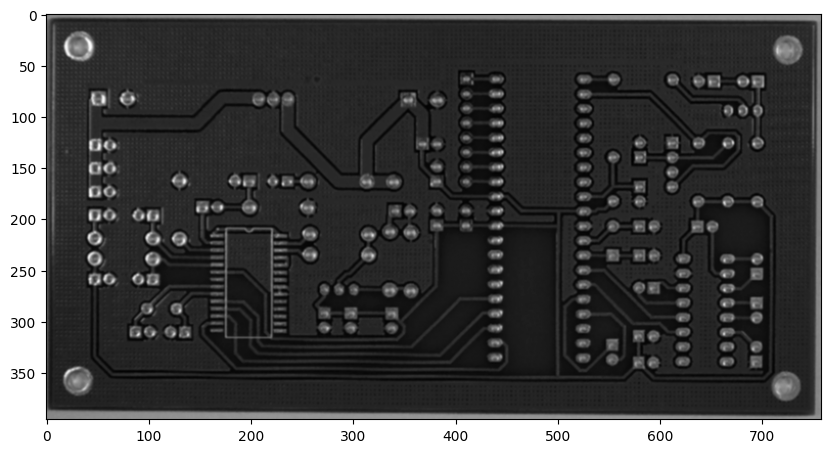

In [ ]:
# Gaussian blur to blur the image before thresholding
blur_template_img = cv2.GaussianBlur(template_img_resize, (3,3),0)

# display the blurred image
plt.figure(figsize=(10,6))
plt.imshow(blur_template_img, cmap="gray")

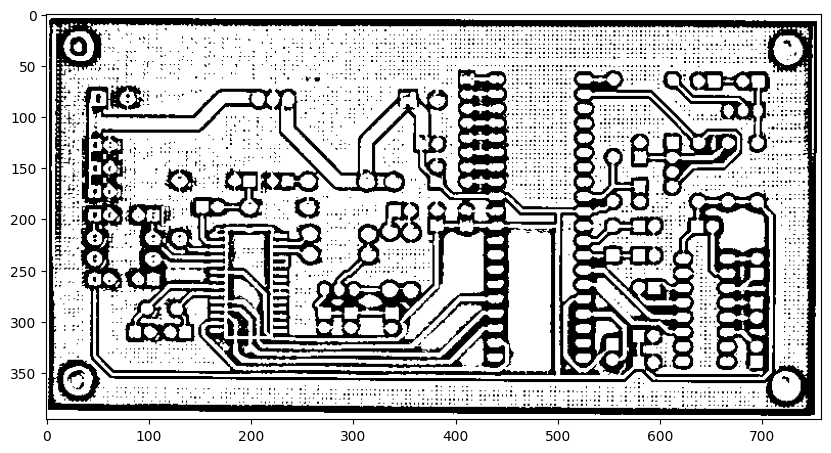

In [ ]:
template_adap_thresh = cv2.adaptiveThreshold(blur_template_img, 255,
                                         cv2. ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 15, 5)

# display the thresholded image
plt.figure(figsize=(10,6))
plt.imshow(template_adap_thresh, cmap="gray")

In [ ]:
# Folder containing test images
test_folder = "/content/drive/MyDrive/PCB_DATASET/images/Missing_hole/01_missing_hole"

# Get all .jpg files from folder
test_images = [f for f in os.listdir(test_folder) if f.endswith(".jpg")]

print("Number of test images found:", len(test_images))

out_dir = "/content/drive/MyDrive/PCB_DATASET/Defect_Patches/Missing_hole/"
os.makedirs(out_dir, exist_ok=True)

Number of test images found: 20


In [ ]:
for img_name in test_images:
    print("\nProcessing:", img_name)

    # read test image
    img_path = os.path.join(test_folder, img_name)
    test_img = cv2.imread(img_path, 0)

    # resize test image of PCB
    test_img_resize = cv2.resize(test_img, (b,a))
    # Gaussian blur to blur the image before thresholding
    blur_test_img = cv2.GaussianBlur(test_img_resize, (3,3),0)

    # Adaptive thresholding(mean) on test image
    test_adap_thresh = cv2.adaptiveThreshold(blur_test_img, 255,
                                         cv2. ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 15, 5)


    # Image subtraction (template - test)
    sub_img= cv2.subtract(test_adap_thresh, template_adap_thresh)

    # Median blur to eliminate background noise
    final_img = cv2.medianBlur(sub_img, 3)
    # contour detection to get the count of defects
    cnts = cv2.findContours(final_img, cv2.RETR_LIST,
                        cv2.CHAIN_APPROX_SIMPLE)[-2]
    blobs = []
    for cnt in cnts:
        if 1<cv2.contourArea(cnt)<300:
           blobs.append(cnt)

    print("Number of defects in image:")
    print(len(blobs))

    orig = test_img_resize
    mask_img = final_img

    _, thresh = cv2.threshold(mask_img, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST,
                  cv2.CHAIN_APPROX_SIMPLE)
    h_img, w_img = mask_img.shape[:2]

    patch_id = 0
    for cnt in contours:
        if 1<cv2.contourArea(cnt)<300:

          x, y, w, h = cv2.boundingRect(cnt) # bounding rect of defect region [web:8][web:28]

          # Center of defect
          cx = x + w // 2
          cy = y + h // 2

          # Fixed 20x20 box
          bw, bh = 64,64
          x0 = cx - bw // 2
          y0 = cy - bh // 2
          x1 = x0 + bw
          y1 = y0 + bh

          # Clip to image bounds
          x0 = max(0, x0)
          y0 = max(0, y0)
          x1 = min(w_img, x1)
          y1 = min(h_img, y1)

          # Crop from ORIGINAL image using same coords

          patch = orig[y0:y1, x0:x1]

          # Optional: ensure patch is 20x20 (skip if smaller at borders)
          if patch.shape[0] != bh or patch.shape[1] != bw:
            continue

          # Save patch
          out_path = os.path.join(out_dir, f"{img_name}_defect_{patch_id:04d}.png")
          print(f"saving image : {img_name}_defect_{patch_id:04d}.png")
          cv2.imwrite(out_path, patch) # save ROI patch [web:21][web:28]
          patch_id += 1


Processing: 01_spur_11.jpg
Number of defects in image:
2
saving image : 01_spur_11.jpg_defect_0000.png
saving image : 01_spur_11.jpg_defect_0001.png
saving image : 01_spur_11.jpg_defect_0002.png
saving image : 01_spur_11.jpg_defect_0003.png

Processing: 01_spur_05.jpg
Number of defects in image:
1
saving image : 01_spur_05.jpg_defect_0000.png
saving image : 01_spur_05.jpg_defect_0001.png
saving image : 01_spur_05.jpg_defect_0002.png

Processing: 01_spur_09.jpg
Number of defects in image:
3
saving image : 01_spur_09.jpg_defect_0000.png
saving image : 01_spur_09.jpg_defect_0001.png
saving image : 01_spur_09.jpg_defect_0002.png
saving image : 01_spur_09.jpg_defect_0003.png
saving image : 01_spur_09.jpg_defect_0004.png

Processing: 01_spur_13.jpg
Number of defects in image:
2
saving image : 01_spur_13.jpg_defect_0000.png
saving image : 01_spur_13.jpg_defect_0001.png
saving image : 01_spur_13.jpg_defect_0002.png
saving image : 01_spur_13.jpg_defect_0003.png

Processing: 01_spur_16.jpg
Numb